# [EN] Amazon Fine Food Reviews - Sentiment Analysis Network

We'll build a neural network from skratch to learn from Amazon's Fine Food Reviews public dataset.

Some important concepts will be apllied:
+ Bag of Words and Word2Vec
+ Model Validation
+ Noise Reduction
+ Stochastic Gradient Descent

The dataset can be found here: [kaggle](https://www.kaggle.com/snap/amazon-fine-food-reviews)

# [PT] Rede Neural de Análise de Sentimento - Amazon Fine Food Reviews
Vamos criar uma rede neural do zero que aprenderá através do dataset público de reviews de comidas finas da Amazon.

Abordaremos alguns conceitos importantes:
+ Bag of Words e Word2Vec
+ Validação de Modelos
+ Redução de Ruído
+ Stochastic Gradient Descent

O dataset pode ser encontrado aqui: [kaggle](https://www.kaggle.com/snap/amazon-fine-food-reviews)

# [EN] Curating the dataset
First of all we need to improve our dataset, to make our life easier.
We'll use the `csv` version of the dataset, with the following indexes:
+ **Id**
+ **ProductId** - unique identifier for the product
+ **UserId** - unqiue identifier for the user
+ **ProfileName**
+ **HelpfulnessNumerator** - number of users who found the review helpful
+ **HelpfulnessDenominator** - number of users who indicated whether they found the review helpful
+ **Score** - rating between 1 and 5
+ **Time** - timestamp for the review
+ **Summary** - brief summary of the review
+ **Text** - text of the review

# [PT] Aprimorando o dataset
A primeira coisa que precisamos fazer é aprimorar o nosso dataset para facilitar nossa vida.
Vamos usar a versão `csv` do dataset, que tem os seguintes índices:
+ **Id**
+ **ProductId** - idetificador único do produto
+ **UserId** - identificador único do usuário
+ **ProfileName**
+ **HelpfulnessNumerator** - número de usuários que acharam essa review útil
+ **HelpfulnessDenominator** - número de usuários que indicaram se acahram essa revisão útil
+ **Score** - avaliação de 1 a 5
+ **Time** - timestamp da review
+ **Summary** - breve resumo da revisão
+ **Text** - texto da revisão

## [EN] Removing unnecessary data
The first step is remove unnecessary data. The things that we consider irrelevant to our model.

We'll remove the following fields: `Id, UserId, ProfileName, HelpfulnessNumerator, HelpfulnessDenominator, Time`.

All we'll consider relevant here is: `ProductId, Score, Summary, Text`

## [PT] Removendo dados desnecessários
O primeiro passo é remover os dados desnecessários. As coisas que achamos irrelevantes para o nosso modelo.

Vamos remover os seguintes campos: `Id, UserId, ProfileName, HelpfulnessNumerator, HelpfulnessDenominator, Time`. 

Só consideraremos relevante: `ProductId, Score, Summary, Text`

In [1]:
import pandas as pd

dataset = pd.read_csv('./Reviews.csv', usecols=['ProductId', 'Score', 'Summary', 'Text'], dtype='unicode')

In [2]:
dataset.head()

ProductId Score                Summary  \
0  B001E4KFG0     5  Good Quality Dog Food   
1  B00813GRG4     1      Not as Advertised   
2  B000LQOCH0     4  "Delight" says it all   
3  B000UA0QIQ     2         Cough Medicine   
4  B006K2ZZ7K     5            Great taffy   

                                                Text  
0  I have bought several of the Vitality canned d...  
1  Product arrived labeled as Jumbo Salted Peanut...  
2  This is a confection that has been around a fe...  
3  If you are looking for the secret ingredient i...  
4  Great taffy at a great price.  There was a wid...

## [EN] Separating the data
Let's separate our data into specific variables to use in our model.

## [PT] Separando os dados
Vamos separar os dados em variáveis específicas para usar no nosso modelo.

In [3]:
products = dataset['ProductId']
scores = dataset['Score']
summaries = dataset['Summary']
texts = dataset['Text']

## [EN] Creating the reviews array
We'll concat all reviews summaries and texts to use their both as the same text on the analysis

## [PT] Criando o array de reviews
Vamos concatenar os resumos e textos das revisões para usarmos como um mesmo texto durante a análise

In [4]:
import numpy as np
import re
#[EN] Using the string '--' as our separator (just for visualization)
#[PT] Usamos a string '--' como separador (apenas para visualização)
reviews = summaries + ' -- ' + texts
reviews = reviews.replace(np.nan, '', regex=True)

TAG_RE = re.compile(r'<[^>]+>')

def remove_tags(text):
    return TAG_RE.sub('', text)

for i in range(len(reviews)):
    reviews[i] = remove_tags(reviews[i])

In [5]:
reviews[0]

'Good Quality Dog Food -- I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.'

In [6]:
int(scores[0]) #First review score

5

In [7]:
len(reviews) #Number of reviews

568454

# [EN] Some visualizations of our data
Let's plot some charts about our data

# [PT] Algumas visualizações dos nossos dados
Vamos criar alguns gráficos sobre nossos dados

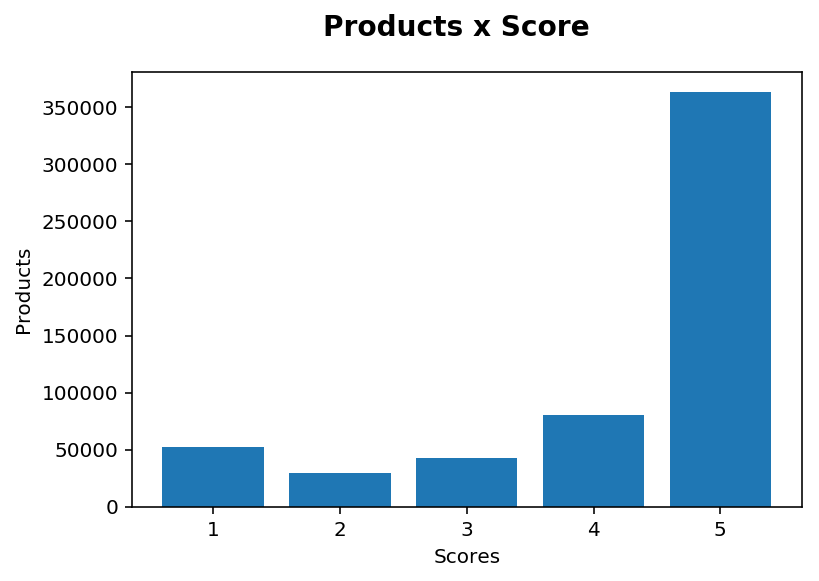

In [8]:
%config InlineBackend.figure_format = 'retina'
%matplotlib inline
#[EN] We'll plot a chart with the relation products x score
#[PT] Vamos criar um gráfico com a relação número de produtos x score
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

#[EN] Variable to count number of products to each score
#[PT] Variável para contar o número de produtos para cada score
scores_counter = Counter()

for i in range(len(reviews)):
    scores_counter[scores[i]] += 1

#[EN] Sorting the counter
#[PT] Ordenando o contador
sorted_counter = sorted(scores_counter.items())

#[EN] Get indexes and values
#[PT] Obetendo índices e valores
scores_index, scores_count = zip(*sorted_counter)

indexes = np.arange(len(scores_index))

#[EN] Creating chart head
#[PT] Criando cabeçalho do gráfico
fig = plt.figure()
fig.suptitle('Products x Score', fontsize=14, fontweight='bold')

ax = fig.add_subplot(111)

#[EN] Adding labels
#[PT] Adicionando legendas
ax.set_ylabel('Products')
ax.set_xlabel('Scores')

#[EN] Creating the chart bars
#[PT] Criando as barras do  gráfico
ax.bar(indexes, scores_count, align='center')

#[EN] Creating X axis
#[PT] Criando eixo X
plt.xticks(indexes, scores_index)

#[EN] Printing the chart
#[PT] Imprimindo gráfico
plt.show()

In [9]:
scores_counter['4'] + scores_counter['5']

443777

In [10]:
scores_counter['1'] + scores_counter['2'] + scores_counter ['3']

124677

# [EN] Converting scores
Now we know a few things about our scores:
+ Most of our products have scores greater than or equal 4
+ The sum of scores between 1-3 is less than the 4-5 sum

Let's convert our scores in labels to help our Network training. We can consider scores 4 and 5 as `POSITIVE` reviews and scores below 4 as `NEGATIVE` ones.

# [PT] Convertendo avaliações
Agora sabemos algumas coisas sobre nossas avaliações:
+ A maior parte dos nossos produtos tem avaliação maior ou igual a 4
+ A soma das avliações entre 1 e 3 é menor que a soma entre 4 e 5

Vamos converter nossas avaliações em labels para facilitar o treinamento da nossa rede neural. Podemos considerar 4 e 5 como reviews `POSITIVE` e avaliações abaixo de 4 como `NEGATIVE`.

In [11]:
import pandas as pd

#[EN] Creating a copy of our scores array
#[PT] Criando uma cópia do nosso array de avaliações
labels = pd.Series.copy(scores)

for i in range(len(scores)):
    if(int(scores[i]) >= 4):
        labels[i] = 'POSITIVE'
    else:
        labels[i] = 'NEGATIVE'

print('Index\tScore\tLabel')
for i in range(0, 5):
    print(str(i) + '\t' + scores[i] + '\t'+ labels[i])

Index	Score	Label
0	5	POSITIVE
1	1	NEGATIVE
2	4	POSITIVE
3	2	NEGATIVE
4	5	POSITIVE


In [12]:
def pretty_print_review_and_label(index):
    print(labels[i] + '\t:\t' + reviews[i][:80] + '...')

for i in range(0, 5):
    pretty_print_review_and_label(i)

POSITIVE	:	Good Quality Dog Food -- I have bought several of the Vitality canned dog food p...
NEGATIVE	:	Not as Advertised -- Product arrived labeled as Jumbo Salted Peanuts...the peanu...
POSITIVE	:	"Delight" says it all -- This is a confection that has been around a few centuri...
NEGATIVE	:	Cough Medicine -- If you are looking for the secret ingredient in Robitussin I b...
POSITIVE	:	Great taffy -- Great taffy at a great price.  There was a wide assortment of yum...


# [EN] Quick Validation
Let's do a quick validation of our theory: If a review is positive, so more positive words will be present on it's text, the same applies to negative ones.

# [PT] Validação rápida
Vamos fazer uma validação rápida da nossa teoria: Se uma avaliação foi positiva, logo teremos mais palavras positivas, o mesmo vale para as negativas.

In [13]:
from collections import Counter
import numpy as np

#[EN] Creating our word counters
#[PT] Criando nossos contadores de palavras
positive_counts = Counter()
negative_counts = Counter()
total_counts = Counter()

for i in range(len(reviews)):
    if(labels[i] == 'POSITIVE'):
        for word in reviews[i].split(' '):
            positive_counts[word] += 1
            total_counts[word] += 1
    else:
        for word in reviews[i].split(' '):
            negative_counts[word] += 1
            total_counts[word] += 1

In [14]:
list(positive_counts.most_common())[0:25]

[('the', 1211164),
 ('I', 1038460),
 ('and', 992559),
 ('a', 919799),
 ('', 763012),
 ('to', 760094),
 ('of', 597088),
 ('is', 568398),
 ('it', 476109),
 ('--', 456057),
 ('for', 437613),
 ('in', 401110),
 ('this', 371328),
 ('my', 293784),
 ('that', 292479),
 ('with', 268300),
 ('have', 262733),
 ('are', 252831),
 ('but', 238561),
 ('you', 224165),
 ('was', 201409),
 ('on', 200883),
 ('as', 197416),
 ('not', 189149),
 ('like', 176807)]

## [EN] Refining our counters
As we can see above, the most common words can help us validate our theory, but these words are generic and don't have relation with emotion, or with the labels `POSITIVE` and `NEGATIVE`.

So, let's refine this counters, creating a ratio and eliminating this generic words.

## [PT] Refinando nossos contadores
Como podemos ver acima, as palavras que mais se repetem podem nos ajudar a provar nossa teoria, mas estas palavras são genéricas e não tem relação com emoção ou com as labels `POSITIVE` e `NEGATIVE`.

Vamos então refinar estes contadores criando um raio e eliminando as palavras genéricas

In [15]:
from collections import Counter
import numpy as np

def calc_pos_neg_ratios(min_cnt):
    pos_neg_ratios = Counter()

    for term, cnt in list(total_counts.most_common()):
        if(cnt > min_cnt):
            pos_neg_ratio = positive_counts[term] / float(negative_counts[term] + 1)
            pos_neg_ratios[term] = pos_neg_ratio
    
    for word, ratio in pos_neg_ratios.most_common():
        if(ratio > 1):
            pos_neg_ratios[word] = np.log(ratio)
        else:
            pos_neg_ratios[word] = -np.log((1 / (ratio + 0.01)))
    
    return pos_neg_ratios

In [30]:
pos_neg_ratios = calc_pos_neg_ratios(300)
list(pos_neg_ratios.most_common())[0:25]

[('Fantastic!', 6.1202974189509503),
 ('Perfect!', 6.0707377280024897),
 ('"Vegan', 5.8888779583328805),
 ('Delicious!!', 5.7333412768977459),
 ('Excellent!', 5.6442683471237931),
 ('Delicious!', 5.5672533961787627),
 ('Yummy!', 5.3985739702876874),
 ('Awesome!', 5.3242287483325379),
 ('YUM', 5.1845886012196933),
 ('anytime.', 5.181783550292085),
 ('addictive!', 4.9972122737641147),
 ('Addictive', 4.9487598903781684),
 ('Amazing!', 4.9416424226093039),
 ('Wonderful!', 4.8402423081675749),
 ('Stuff!', 4.7916497529307094),
 ('Yum!', 4.7757564865636253),
 ('Superb', 4.7449321283632502),
 ('favorites!', 4.7214706416842516),
 ('Booda', 4.6118147287067597),
 ('YUMMY!', 4.5660827972800444),
 ('hooked.', 4.5302926870553408),
 ('Tasty!', 4.5290088250225278),
 ('favorite!', 4.4021355875965948),
 ('far!', 4.3489867805956814),
 ('Wonderful', 4.3435814827641801)]

**[EN]** Well, now we can see the expected result: Positive words frequently in positive reviews and negative words frequently in negative reviews as we can se below:

**[PT]** Agora podemos ver o resultado esperado: Palavras positivas com frequência em reviews positivas e palavras negativas com frequência em reviews negativas como podemos ver abaixo:

In [31]:
list(reversed(pos_neg_ratios.most_common()))[0:25]

[('Disappointing', -3.5089762781842633),
 ('Terrible', -3.0100291726782182),
 ('Awful', -3.0080618000647603),
 ('Horrible', -2.9153950584420132),
 ('Stale', -2.8168745234792243),
 ('Yuck!', -2.7704856720430024),
 ('Worst', -2.7248573194185912),
 ('Weak', -2.6030203186099024),
 ('Bland', -2.5900607883942222),
 ('Misleading', -2.5571662199861542),
 ('Disappointed', -2.5304867817546723),
 ('deliberately', -2.5174652359649476),
 ('deceptive', -2.3929920589848139),
 ('Buyer', -2.2763586070735378),
 ('Nasty', -2.0952175042740033),
 ('intentionally', -1.9093152579796995),
 ('refund.', -1.8337525612003409),
 ('Waste', -1.7476711730925014),
 ('Poor', -1.739808180418392),
 ('Evo,', -1.6660700285375662),
 ('Shame', -1.6642568514993177),
 ('worst', -1.613454118778703),
 ('disappointing.', -1.6001485542675802),
 ('horrible.', -1.5595586608122152),
 ('disappointment.', -1.5504318504530763)]

# [EN] Transforming words into numbers
WoW!! Our theory is valid! There is a correlation between positive words and positive reviews, or vice-versa.

Now, we need to transform our text into numbers, so that way our Neural Network will be able to learn from data and search for correlation in a better and efficient way.

# [PT] Transformando palavras em números
WoW!! Nossa teoria é válida! Existe uma correlação entre palavras positivas e reviews positivas, ou vice-versa.

Agora, precisamos transformar texto em números, desta forma nossa Rede Neural poderá aprender através dos dados e procurar por essas relações de uma maneira melhor e mais eficiente.

## [EN] Understanding the Neural Network
Our network will receive words converted into numbers as signal, and will be make a prediction (positive or negative) based on these words, as we can see in the image below:

## [PT] Entendendo a Rede Neural
Nossa rede neural irá receber palavras convertidas em números como sinal e fará previsões (positivo ou negativo) baseada nestas palavras, como podemos ver na imagem abaixo:

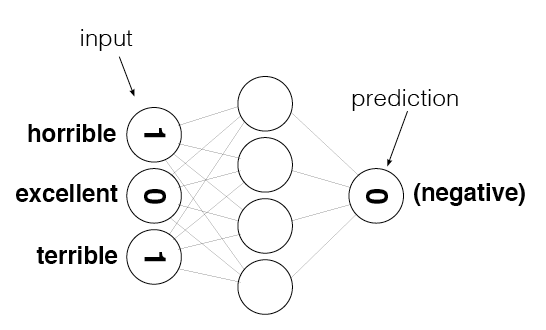

In [18]:
from IPython.display import Image

review = 'This is a horrible food. Terrible!'

Image(filename='sentiment_network.png')

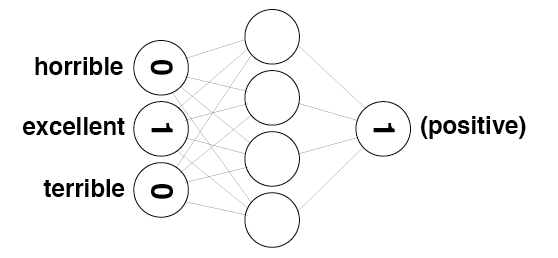

In [19]:
review = 'I love this food! Its excellent'

Image(filename='sentiment_network_pos.png')

## [EN] Transforming the data
Let's start transforming our words into numbers. This method is called `Bag of Words`. We'll just count how many times the word appears on each review. This is easy to do with the `collections.Counter` class.

## [PT] Transformando os dados
Vamos transformar nossas palavras em números. Este método é chamado `Bag of Words`. Nós apenas contaremos quantas vezes a palavra aparece em cada review. Isso é facil de fazer com a classe `collections.Counter`

In [20]:
#[EN] Defining our vocabullary and it's size
#[PT] Definindo nosso vocabulário e seu tamanho
vocab = set(total_counts.keys())
vocab_size = len(vocab)

print(vocab_size)

713871


In [23]:
import numpy as np

#[EN] Our input layer will be called layer_0
#[PT] Nossa camada de entrada será chamada layer_0
layer_0 = np.zeros((1, vocab_size))

#[EN] Starting our input layer empty, so we can allocate all needed memory
#[PT] Iniciando nossa camada de input vazia, para alocar a memória necessária
layer_0

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [33]:
#[EN] Changing our vocab, so the words will be indexes and the count will be values
#[PT] Alterando nosso vocabulário, logo palavras serão índices e contadores serão valores
word2index = {}
for i, word in enumerate(vocab):
    word2index[word] = i

list(word2index.items())[0:25]

[('', 0),
 ('Light.But', 1),
 ('anymore.Personally', 2),
 ('desireable.', 3),
 ('«:::A:::»', 4),
 ("satisfying.I'm", 5),
 ('Garlic.To', 6),
 ('recurrence', 7),
 ('anyproblems', 8),
 ('meal-bar', 9),
 ('up.Good', 10),
 ('[[ASIN:B001E5DYT4', 11),
 ('---Mightly', 12),
 ('PACKAGE.', 13),
 ('generically', 14),
 ('Course!)', 15),
 ("'Jet", 16),
 ('impressed.Arrives', 17),
 ('things.So', 18),
 ('Chopped', 19),
 ('strawberry/cherry...and', 20),
 ('both.[...]', 21),
 ('divine.One', 22),
 ('icky-sweet', 23),
 ('food.Cesar', 24)]

In [37]:
#[EN] We'll create a function to update our input layer for each review
#[PT] Vamos criar uma função para atualizar nossa camada de entrada para cada review
def update_input_layer(review):

    #[EN] Using the global input layer
    #[PT] Usando a camada de entrada global
    global layer_0

    #[EN] Remove any previous state
    #[PT] Removendo qualquer estado anterior
    layer_0 *= 0

    #[EN] Counting words of the review
    #[PT] Contando as palavras do review
    for word in review.split(' '):
        layer_0[0][word2index[word]] += 1

update_input_layer(reviews[0])

In [38]:
layer_0

array([[ 1.,  0.,  0., ...,  0.,  0.,  0.]])

In [40]:
#[EN] Convert our labels to 1 or 0 to check our predictions
#[PT] Convertendo os labels para 1 ou 0 para validar nossas previsões
def get_target_for_label(label):
    if(label == 'POSITIVE'):
        return 1
    else:
        return 0

In [42]:
labels[0]

'POSITIVE'

In [41]:
get_target_for_label(labels[0])

1

# [EN] Creating our Neural Network
Now we have the necessary functions to convert our data into numbers, so let's start building our Neural Network!

# [PT] Criando nossa Rede Neural
Agora temos as funções necessárias para converter nossos dados em números, então vamos começar a construir nossa Rede Neural!

In [74]:
import time
import sys
import numpy as np


class SentimentNetwork(object):
    def __init__(self, reviews, labels, hidden_nodes = 10, learning_rate = 0.1):
        
        #[EN] Set a random number generator (most used for debugging)
        #[PT] Criando um gerador de números aleatórios (mais usado para debug)
        np.random.seed(1)

        #[EN] Pre processing our data
        #[PT] Pre processando nossos dados
        self.pre_process_data(reviews, labels)
        
        #[EN] Initializing our network
        #[PT] Inicializando nossa rede
        self.init_network(len(self.review_vocab), hidden_nodes, 1, learning_rate)
                    
    def pre_process_data(self, reviews, labels):
        
        #[EN] Creating our review vocabullary
        #[PT] Criando nosso vocabulário de reviews
        review_vocab = set()
        for review in reviews:
            for word in review.split(' '):
                review_vocab.add(word)
        
        self.review_vocab = list(review_vocab)
        
        #[EN] Creating our label vocabullary
        #[PT] Criando nosso vocabulário de labels
        label_vocab = set()
        for label in labels:
            label_vocab.add(label)
        
        self.label_vocab = list(label_vocab)
        
        #[EN] Get eh vocabullary sizes
        #[PT] Obtendo o tamanho dos vocabulários
        self.review_vocab_size = len(self.review_vocab)
        self.label_vocab_size = len(self.label_vocab)
        
        #[EN] Converting words to indexes
        #[PT] Convertendo palavras para índices
        self.word2index = {}
        
        for i, word in enumerate(self.review_vocab):
            self.word2index[word] = i
        
        #[EN] Converting labels to indexes
        #[PT] Convertendo labels para índices
        self.label2index = {}
        for i, label in enumerate(self.label_vocab):
            self.label2index[label] = i

    def init_network(self, input_nodes, hidden_nodes, output_nodes, learning_rate):
        
        #[EN] Set our layer's nodes
        #[PT] Criando nossos nós de camada
        self.input_nodes = input_nodes
        self.hidden_nodes = hidden_nodes
        self.output_nodes = output_nodes
        
        #[EN] Initialize our weights
        #[PT] Inicializando os pesos
        self.weights_0_1 = np.zeros((self.input_nodes, self.hidden_nodes)) #input to hidden
        self.weights_1_2 = np.random.normal(0.0, self.output_nodes**-0.5,
                                            (self.hidden_nodes, self.output_nodes)) #hidden to output
        
        #[EN] Initialize the learning rate
        #[PT] Inicializando taxa de aprendizado
        self.learning_rate = learning_rate
        
        #[EN] Allocate memory for input layer
        #[PT] Alocando memória para a  camada de entrada
        self.layer_0 = np.zeros((1, input_nodes))

    def update_input_layer(self, review):
        
        #[EN] Clear the previous state
        #[PT] Limpando estado anterior
        self.layer_0 *= 0
        
        for word in review.split(' '):
            if(word in self.word2index.keys()):
                self.layer_0[0][self.word2index[word]] += 1
    
    def get_target_for_label(self, label):
        
        #[EN] Convert labels to 1 or 0
        #[PT] Convertendo labels para 1 ou 0
        if(label == 'POSITIVE'):
            return 1
        else:
            return 0

    def sigmoid(self, x):

        #[EN] Using sigmoid as activation function
        #[PT] Usando sigmoid como função de ativação
        return 1 / (1 + np.exp(-x))
    
    def sigmoid_output_2_derivative(self, output):
        
        #[EN] Derivative of outputs
        #[PT] Derivada das saídas
        return output * (1 - output)

    def train(self, training_reviews, training_labels):
        
        #[EN] Checking if reviews and labels have the same length
        #[PT] Verificando se reviews e labels tem o mesmo tamanho
        assert(len(traning_reviews) == len(traning_labels))
        
        #[EN] Tracking predictions right or wrong
        #[PT] Rastreando previsões certas ou erradas
        correct_so_far = 0
        
        #[EN] The traning start time
        #[PT] Horário que o treinamento começou
        start = time.time()
        
        for i in range(len(traning_reviews)):
            
            #[EN] Starting review and label variables
            #[PT] Iniciando as variáveis review e label
            review = traning_reviews[i]
            label = training_labels[i]
            
            #### [EN] Forward propagation ####
            #### [PT] propagação adiante  ####
            
            #[EN] Update input layer
            #[PT] Atualizando camada de entrada
            self.update_input_layer(review)
            
            #[EN] Hidden layer
            #[PT] Camada oculta
            layer_1 = self.layer_0.dot(self.weights_0_1)
            
            #[EN] Output layer
            #[PT] Camada de saída
            layer_2 = self.sigmoid(layer_1.dot(self.weights_1_2))
            
            #### [EN] Back propagation   ####
            #### [PT] Propagação reversa ####
            
            #[EN] Output layer errors
            #[PT] Erros da camada de saída
            layer_2_error = layer_2 - self.get_target_for_label(label)
            layer_2_delta = layer_2_error * self.sigmoid_output_2_derivative(layer_2)
            
            #[EN] Hidden layer errors
            #[PT] Erros da camada oculta
            layer_1_error = layer_2_delta.dot(self.weights_1_2.T)
            layer_1_delta = layer_1_error
            
            #[EN] Updating weights
            #[PT] Atualizando pesos
            self.weights_1_2 -= layer_1.T.dot(layer_2_delta) * self.learning_rate
            self.weights_0_1 -= self.layer_0.T.dot(layer_1_delta) * self.learning_rate
            
            #[EN] Updating the correct_so_far based on layer 2 errors
            #[PT] Atualizando correct_so_far baseado nos erros da camada 2
            if(np.abs(layer_2_error) < 0.5):
                correct_so_far += 1
            
            #[EN] Counting reviews per second
            #[PT] Contando reviews por segundo
            reviews_per_second = i / float(time.time() - start)
            
            #[EN] Logging our progress
            #[PT] Logando nosso progresso
            sys.stdout.write("\rProgress:" + str(100 * i/float(len(training_reviews)))[:4] \
                             + "% Speed(reviews/sec):" + str(reviews_per_second)[0:5] \
                             + " #Correct:" + str(correct_so_far) + " #Trained:" + str(i+1) \
                             + " Training Accuracy:" + str(correct_so_far * 100 / float(i+1))[:4] + "%")
        print('')
        
    def test(self, testing_reviews, testing_labels):
        
        correct = 0
        
        start = time.time()
        
        for i in range(len(testing_reviews)):
            pred = self.run(testing_reviews[i])
            if(pred == testing_labels[i]):
                correct += 1
            
            reviews_per_second = i / float(time.time() - start)
            
            sys.stdout.write("\rProgress:" + str(100 * i/float(len(testing_reviews)))[:4] \
                             + "% Speed(reviews/sec):" + str(reviews_per_second)[0:5] \
                             + " #Correct:" + str(correct) + " #Tested:" + str(i+1) \
                             + " Testing Accuracy:" + str(correct * 100 / float(i+1))[:4] + "%")
    
    def run(self, review):
        
        #[EN]Input Layer
        #[PT] Camada de entrada
        self.update_input_layer(review.lower())

        #[EN] Hidden layer
        #[PT] Camada oculta
        layer_1 = self.layer_0.dot(self.weights_0_1)

        #[EN] Output layer
        #[PT] Camada de saída
        layer_2 = self.sigmoid(layer_1.dot(self.weights_1_2))
        
        if(layer_2[0] > 0.5):
            return "POSITIVE"
        else:
            return "NEGATIVE"
        

In [75]:
#[EN] Traning data
#[PT] Dados de treinamento
training_reviews = np.array(reviews.iloc[:-1000])
training_labels = np.array(labels.iloc[:-1000])

#[EN] Testing data
#[PT] Dados de teste
testing_reviews = np.array(reviews.iloc[-1000:])
testing_labels = np.array(labels.iloc[-1000:])

#[EN] Initialize network
#[PT] Initialize network
msn = SentimentNetwork(training_reviews, training_labels, learning_rate = 0.1)

In [76]:
msn.test(testing_reviews, testing_labels)

Progress:99.9% Speed(reviews/sec):264.4 #Correct:280 #Tested:1000 Testing Accuracy:28.0%